<a href="https://colab.research.google.com/github/LuisAFD1/BitNet-1.58-comparison/blob/main/BitNet__comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Definition of a simple example model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#FP8 quantization (simulated)
def quantize_fp8(model):
    for param in model.parameters():
        param.data = torch.round(param.data * (2**7)) / (2**7)
    return model

#BitNet Quantization 1.58 (simulated)
def quantize_bitnet_1_58(model):
    for param in model.parameters():
        param.data = torch.sign(param.data) * torch.clamp(torch.abs(param.data), 0, 1)
    return model

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = nn.CrossEntropyLoss()(output, target)
        loss.backward()
        optimizer.step()

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += nn.CrossEntropyLoss()(output, target).item() * data.size(0)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, accuracy

# Load data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Create and quantize models
model_fp8 = SimpleNN().to(device)
optimizer_fp8 = optim.Adam(model_fp8.parameters(), lr=0.01)
model_fp8 = quantize_fp8(model_fp8)

model_bitnet_1_58 = SimpleNN().to(device)
optimizer_bitnet_1_58 = optim.Adam(model_bitnet_1_58.parameters(), lr=0.01)
model_bitnet_1_58 = quantize_bitnet_1_58(model_bitnet_1_58)

# Training
epochs = 3
for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}")
    train(model_fp8, device, train_loader, optimizer_fp8, epoch)
    train(model_bitnet_1_58, device, train_loader, optimizer_bitnet_1_58, epoch)

test_loss_fp8, accuracy_fp8 = test(model_fp8, device, test_loader)
test_loss_bitnet_1_58, accuracy_bitnet_1_58 = test(model_bitnet_1_58, device, test_loader)

print(f'FP8 - Test loss: {test_loss_fp8:.4f}, Accuracy: {accuracy_fp8:.2f}%')
print(f'BitNet 1.58 - Test loss: {test_loss_bitnet_1_58:.4f}, Accuracy: {accuracy_bitnet_1_58:.2f}%')


Usando dispositivo: cuda
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4621052.53it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 132049.74it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1269242.45it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3737596.38it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1
Epoch 2
Epoch 3
FP8 - Test loss: 0.2797, Accuracy: 93.41%
BitNet 1.58 - Test loss: 0.2021, Accuracy: 95.31%


Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10


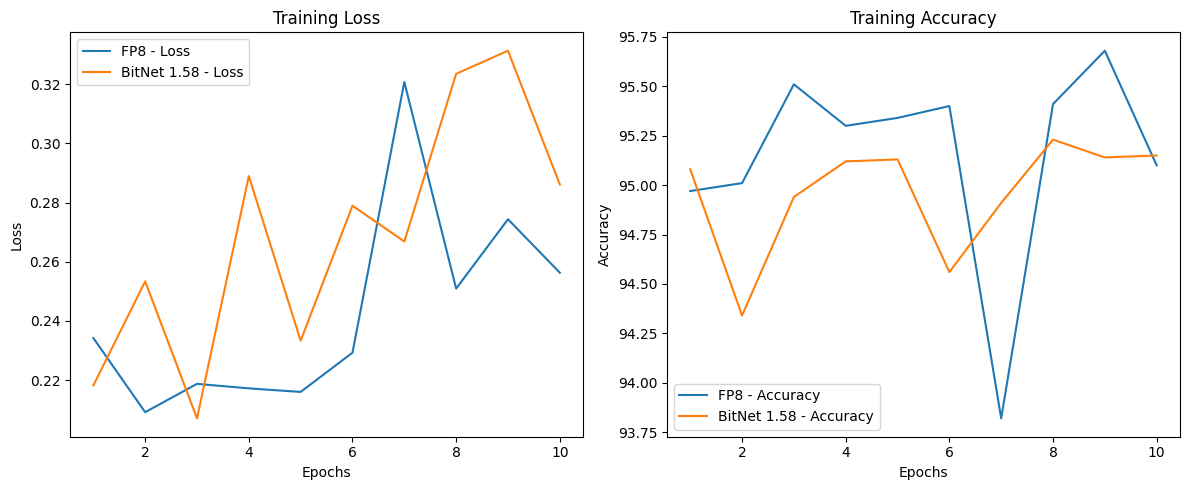

In [ ]:
import matplotlib.pyplot as plt

# Training and data collection for the graph
epochs = 10
train_losses_fp8 = []
train_losses_bitnet_1_58 = []
test_losses_fp8 = []
test_losses_bitnet_1_58 = []
accuracies_fp8 = []
accuracies_bitnet_1_58 = []

for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}")
    train(model_fp8, device, train_loader, optimizer_fp8, epoch)
    train(model_bitnet_1_58, device, train_loader, optimizer_bitnet_1_58, epoch)

    test_loss_fp8, accuracy_fp8 = test(model_fp8, device, test_loader)
    test_loss_bitnet_1_58, accuracy_bitnet_1_58 = test(model_bitnet_1_58, device, test_loader)

    train_losses_fp8.append(test_loss_fp8)
    train_losses_bitnet_1_58.append(test_loss_bitnet_1_58)
    test_losses_fp8.append(test_loss_fp8)
    test_losses_bitnet_1_58.append(test_loss_bitnet_1_58)
    accuracies_fp8.append(accuracy_fp8)
    accuracies_bitnet_1_58.append(accuracy_bitnet_1_58)

# Graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses_fp8, label='FP8 - Loss')
plt.plot(range(1, epochs + 1), train_losses_bitnet_1_58, label='BitNet 1.58 - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), accuracies_fp8, label='FP8 - Accuracy')
plt.plot(range(1, epochs + 1), accuracies_bitnet_1_58, label='BitNet 1.58 - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Detailed training and evaluation
for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}")
    train(model_fp8, device, train_loader, optimizer_fp8, epoch)
    train(model_bitnet_1_58, device, train_loader, optimizer_bitnet_1_58, epoch)

    test_loss_fp8, accuracy_fp8 = test(model_fp8, device, test_loader)
    test_loss_bitnet_1_58, accuracy_bitnet_1_58 = test(model_bitnet_1_58, device, test_loader)

    print(f'Epoch {epoch}: FP8 - Test loss: {test_loss_fp8:.4f}, Accuracy: {accuracy_fp8:.2f}%')
    print(f'Epoch {epoch}: BitNet 1.58 - Test loss: {test_loss_bitnet_1_58:.4f}, Accuracy: {accuracy_bitnet_1_58:.2f}%')


Epoch 1
Epoch 1: FP8 - Test loss: 0.2650, Accuracy: 95.78%
Epoch 1: BitNet 1.58 - Test loss: 0.3066, Accuracy: 95.65%
Epoch 2
Epoch 2: FP8 - Test loss: 0.2857, Accuracy: 95.61%
Epoch 2: BitNet 1.58 - Test loss: 0.3191, Accuracy: 94.89%
Epoch 3
Epoch 3: FP8 - Test loss: 0.3723, Accuracy: 94.74%
Epoch 3: BitNet 1.58 - Test loss: 0.2853, Accuracy: 95.53%
Epoch 4
Epoch 4: FP8 - Test loss: 0.3065, Accuracy: 95.55%
Epoch 4: BitNet 1.58 - Test loss: 0.3920, Accuracy: 95.22%
Epoch 5
Epoch 5: FP8 - Test loss: 0.3428, Accuracy: 95.11%
Epoch 5: BitNet 1.58 - Test loss: 0.3506, Accuracy: 95.61%
Epoch 6
Epoch 6: FP8 - Test loss: 0.2857, Accuracy: 95.83%
Epoch 6: BitNet 1.58 - Test loss: 0.3452, Accuracy: 95.33%
Epoch 7
Epoch 7: FP8 - Test loss: 0.3455, Accuracy: 95.20%
Epoch 7: BitNet 1.58 - Test loss: 0.3254, Accuracy: 95.45%
Epoch 8
Epoch 8: FP8 - Test loss: 0.3839, Accuracy: 95.30%
Epoch 8: BitNet 1.58 - Test loss: 0.3652, Accuracy: 95.03%
Epoch 9
Epoch 9: FP8 - Test loss: 0.3453, Accuracy: 95.3